# Stock Trading test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from elegantrl.train.run_tutorial import *
from elegantrl.train.run_parallel import *
from elegantrl.train.config import Arguments
from elegantrl.agents import AgentPPO, AgentDDPG
from stock_env_multiple import StockEnvMultiple

np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

In [2]:
tics = pd.read_csv('data/filtered_with_ti.csv', header=0)
all_tickers = tics['tic'].unique()
daterange = tics[tics['tic'] == 'AAPL']['Date'].to_numpy()

In [ ]:
tics

In [ ]:
def check_tickers(stock):
    return stock in all_tickers

def check_date(date):
    return date in daterange

In [ ]:
check_date('20')

In [ ]:
check_tickers('TSLA')

In [ ]:
# Arguments


In [4]:
tickers = {'TSLA': 0, 'AAPL': 0, 'MSFT': 0}
initial_stocks = np.zeros([len(tickers), 1])


gamma = 0.99
max_stock = 1e2
initial_capital = 1e6
initial_stocks = np.zeros(len(tickers), dtype=np.float32)

start_date = '2006-01-03'
end_date = '2015-03-20'
start_eval_date = '2016-01-01'
end_eval_date = '2021-01-01'

# Agent
ppo = AgentPPO.AgentPPO() # AgentSAC(), AgentTD3(), AgentDDPG()?
ppo.if_use_gae = True
ppo.lambda_entropy = 0.04
ppo.if_on_policy = True

# Environment
env = StockEnvMultiple(daterange, tickers=tickers, begin_date=start_date, end_date=end_date)
env.max_step = 100

args = Arguments(env, ppo)


# Hyperparameters
args.gamma = gamma
args.cwd = './models/RLStockPPO_v3/'
args.break_step = int(2e5)
args.net_dim = 2 ** 9
args.max_step = args.env.max_step
args.max_memo = args.max_step * 4
args.reward_scale = 1e-4
args.batch_size = 2 ** 10
args.repeat_times = 1
args.eval_gap = 2 ** 4
args.eval_times1 = 2 ** 3
args.eval_times2 = 2 ** 5
args.worker_num = 4
args.thread_num = 16
args.if_allow_break = False
args.target_return = 1.1e7
args.rollout_num = 6 # the number of rollout workers (larger is not always faster)

Using stocks: ['TSLA', 'AAPL', 'MSFT']
[1000000.00 0.00 0.00 0.00 0.00 72.38 26.25 0.00 74.75 26.84 0.00 0.00
 0.00 0.00 0.00 0.00 0.00 28712830.00 79970550.00 0.00 0.00 0.00 0.00 0.00
 0.00]


In [14]:
day_data = env._get_data_dict(env.get_index('2006-01-04'))
env._build_state(day_data)
env.step(np.array([0.1, -0.1, 0.1]))

(array([997449.90, 0.00, 0.00, 100.00, 0.00, 83.08, 26.75, 0.00, 82.49,
        26.83, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 170862420.00,
        48968520.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]),
 -14.400000000023283,
 False,
 {})

In [15]:
a = time.time()
train_and_evaluate_mp(args)
print(time.time() - a)

| Remove cwd: ./models/RLStockPPO_v3/
| build_env(): Warning. NOT suggest to use `deepcopy(env)`. env_name: RLStockEnv-v3
################################################################################
ID     Step    maxR |    avgR   stdR   avgS  stdS |    expR   objC   etc.
0  2.78e+04-329051.69 |
0   2.78e+04 -329051.69 |-329051.69 184791.1      99      0 |    0.09 12720.20   0.01  -0.50
0   6.49e+04 -329051.69 |-724910.81 43107.2      99      0 |    0.20 3619.62  -0.04  -0.50
0   9.27e+04 -329051.69 |-874476.19 42971.5      99      0 |    0.30 2548.48  -0.02  -0.50
0   1.30e+05 -329051.69 |-1024997.25 42842.9      99      0 |    0.43 1668.88   0.01  -0.50
0   1.58e+05 -329051.69 |-1175771.12 43556.4      99      0 |    0.55 1351.32  -0.03  -0.50
0   1.95e+05 -329051.69 |-1327439.88 43243.2      99      0 |    0.72 1728.04   0.04  -0.50
| UsedTime:     143 | SavedDir: ./models/RLStockPPO_v3/


[W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]


157.14141964912415


In [ ]:
args.env.stocks

[0.0, 0.0, 0.0]
Using stocks: ['TSLA', 'AAPL', 'MSFT']
[1000000.00 0.00 0.00 0.00 226.36 105.75 54.93 223.43 102.71 55.05 47.11
 38.40 49.81 1.34 -2.90 0.42 260625105.00 448045936.00 -1486904880.00
 -122.35 -158.46 -64.41 16.41 32.56 17.18]
| Keep cwd: ./models/RLStockPPO_v3/
[1000000.00 0.00 0.00 0.00 226.36 105.75 54.93 223.43 102.71 55.05 47.11
 38.40 49.81 1.34 -2.90 0.42 260625105.00 448045936.00 -1486904880.00
 -122.35 -158.46 -64.41 16.41 32.56 17.18]
[0.84 -0.85 0.04]
{'TSLA': 83.0, 'AAPL': 0, 'MSFT': 3.0}
[0.84 -0.85 0.04]
{'TSLA': 166.0, 'AAPL': 0, 'MSFT': 6.0}
[0.83 -0.85 0.05]
{'TSLA': 249.0, 'AAPL': 0, 'MSFT': 10.0}
[0.84 -0.84 0.03]
{'TSLA': 332.0, 'AAPL': 0, 'MSFT': 13.0}
[0.84 -0.84 0.01]
{'TSLA': 415.0, 'AAPL': 0, 'MSFT': 14.0}
[0.84 -0.84 0.02]
{'TSLA': 498.0, 'AAPL': 0, 'MSFT': 15.0}
[0.84 -0.84 0.01]
{'TSLA': 581.0, 'AAPL': 0, 'MSFT': 16.0}
[0.84 -0.84 0.02]
{'TSLA': 664.0, 'AAPL': 0, 'MSFT': 17.0}
[0.84 -0.84 0.02]
{'TSLA': 747.0, 'AAPL': 0, 'MSFT': 18.0}
[0.84 -0.

/home/saad/Code/stock-trading/stock_env_multiple.py:214: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  s_tensor = _torch.as_tensor((state,), device=device).float()


{'TSLA': 2839.0, 'AAPL': 0, 'MSFT': 26.0}
[0.84 -0.84 0.00]
{'TSLA': 2923.0, 'AAPL': 0, 'MSFT': 26.0}
[0.84 -0.84 -0.00]
{'TSLA': 3007.0, 'AAPL': 0, 'MSFT': 26.0}
[0.84 -0.84 -0.00]
{'TSLA': 3091.0, 'AAPL': 0, 'MSFT': 26.0}
[0.84 -0.84 0.01]
{'TSLA': 3175.0, 'AAPL': 0, 'MSFT': 26.0}
[0.84 -0.84 -0.01]
{'TSLA': 3259.0, 'AAPL': 0, 'MSFT': 26.0}
[0.84 -0.84 -0.00]
{'TSLA': 3343.0, 'AAPL': 0, 'MSFT': 26.0}
[0.84 -0.84 0.00]
{'TSLA': 3427.0, 'AAPL': 0, 'MSFT': 26.0}
[0.84 -0.84 0.01]
{'TSLA': 3511.0, 'AAPL': 0, 'MSFT': 26.0}
[0.84 -0.84 0.00]
{'TSLA': 3595.0, 'AAPL': 0, 'MSFT': 26.0}
[0.84 -0.84 0.00]
{'TSLA': 3679.0, 'AAPL': 0, 'MSFT': 26.0}
[0.84 -0.84 0.01]
{'TSLA': 3763.0, 'AAPL': 0, 'MSFT': 26.0}
[0.84 -0.84 0.00]
{'TSLA': 3847.0, 'AAPL': 0, 'MSFT': 26.0}
[0.84 -0.84 0.01]
{'TSLA': 3930.0, 'AAPL': 0, 'MSFT': 27.0}
[0.84 -0.84 0.03]
{'TSLA': 4013.0, 'AAPL': 0, 'MSFT': 29.0}
[0.83 -0.85 0.05]
{'TSLA': 4096.0, 'AAPL': 0, 'MSFT': 33.0}
[0.83 -0.85 0.07]
{'TSLA': 4178.0, 'AAPL': 0, 'MSFT': 

{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.84 -0.84 0.01]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.84 -0.84 0.02]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.84 -0.84 0.00]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.84 -0.84 -0.01]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.84 -0.84 -0.00]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.84 -0.84 -0.01]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.84 -0.84 -0.01]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.84 -0.84 0.00]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.84 -0.84 0.01]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.84 -0.84 0.00]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.84 -0.84 0.00]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.84 -0.84 0.02]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.84 -0.84 0.01]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.84 -0.84 0.02]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.84 -0.84 0.01]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.84 -0.84 0.01]
{'TSLA': 5038.0, 'AA

{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.68 -0.89 0.52]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.70 -0.89 0.49]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.69 -0.89 0.51]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.66 -0.89 0.55]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.65 -0.89 0.56]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.62 -0.89 0.60]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.62 -0.89 0.60]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.63 -0.89 0.58]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.69 -0.89 0.50]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.73 -0.88 0.43]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.71 -0.88 0.48]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.72 -0.88 0.45]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.74 -0.88 0.42]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.74 -0.88 0.41]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.73 -0.88 0.43]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.74 -0.88 0.42]
{'TSLA': 5038.0, 'AAPL':

{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.25 -0.87 0.79]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.17 -0.86 0.81]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.15 -0.86 0.82]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.16 -0.86 0.81]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.22 -0.87 0.80]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.07 -0.85 0.83]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.07 -0.85 0.83]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.15 -0.86 0.82]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.22 -0.87 0.80]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.22 -0.87 0.80]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.20 -0.86 0.80]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.27 -0.87 0.79]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.21 -0.87 0.80]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.17 -0.86 0.81]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.24 -0.87 0.79]
{'TSLA': 5038.0, 'AAPL': 0, 'MSFT': 110.0}
[0.16 -0.86 0.81]
{'TSLA': 5038.0, 'AAPL':

{'TSLA': 4461.0, 'AAPL': 0, 'MSFT': 1907.0}
[0.15 -0.86 0.81]
{'TSLA': 4461.0, 'AAPL': 0, 'MSFT': 1907.0}
[0.10 -0.85 0.82]
{'TSLA': 4461.0, 'AAPL': 0, 'MSFT': 1907.0}
[0.05 -0.85 0.83]
{'TSLA': 4461.0, 'AAPL': 0, 'MSFT': 1907.0}
[-0.00 -0.84 0.84]
{'TSLA': 4461.0, 'AAPL': 0, 'MSFT': 1907.0}
[-0.02 -0.84 0.84]
{'TSLA': 4460.0, 'AAPL': 0, 'MSFT': 1910.0}
[0.04 -0.85 0.84]
{'TSLA': 4460.0, 'AAPL': 0, 'MSFT': 1910.0}
[-0.02 -0.84 0.84]
{'TSLA': 4458.0, 'AAPL': 0, 'MSFT': 1916.0}
[-0.08 -0.83 0.85]
{'TSLA': 4451.0, 'AAPL': 0, 'MSFT': 1937.0}
[-0.03 -0.84 0.84]
{'TSLA': 4449.0, 'AAPL': 0, 'MSFT': 1943.0}
[-0.08 -0.83 0.85]
{'TSLA': 4441.0, 'AAPL': 0, 'MSFT': 1968.0}
[-0.02 -0.84 0.84]
{'TSLA': 4439.0, 'AAPL': 0, 'MSFT': 1974.0}
[0.02 -0.84 0.84]
{'TSLA': 4439.0, 'AAPL': 0, 'MSFT': 1974.0}
[-0.05 -0.83 0.85]
{'TSLA': 4435.0, 'AAPL': 0, 'MSFT': 1985.0}
[-0.11 -0.82 0.85]
{'TSLA': 4425.0, 'AAPL': 0, 'MSFT': 2013.0}
[-0.09 -0.83 0.85]
{'TSLA': 4417.0, 'AAPL': 0, 'MSFT': 2035.0}
[-0.15 -0.81 0.8

[0.15 -0.86 0.82]
{'TSLA': 1749.0, 'AAPL': 0, 'MSFT': 9508.0}
[0.24 -0.87 0.79]
{'TSLA': 1749.0, 'AAPL': 0, 'MSFT': 9508.0}
[0.11 -0.86 0.82]
{'TSLA': 1749.0, 'AAPL': 0, 'MSFT': 9508.0}
[0.23 -0.87 0.80]
{'TSLA': 1749.0, 'AAPL': 0, 'MSFT': 9508.0}
[0.36 -0.88 0.76]
{'TSLA': 1749.0, 'AAPL': 0, 'MSFT': 9508.0}
[0.15 -0.86 0.82]
{'TSLA': 1749.0, 'AAPL': 0, 'MSFT': 9508.0}
[0.20 -0.86 0.80]
{'TSLA': 1749.0, 'AAPL': 0, 'MSFT': 9508.0}
[0.21 -0.87 0.80]
{'TSLA': 1749.0, 'AAPL': 0, 'MSFT': 9508.0}
[0.09 -0.85 0.83]
{'TSLA': 1749.0, 'AAPL': 0, 'MSFT': 9508.0}
[-0.02 -0.84 0.84]
{'TSLA': 1748.0, 'AAPL': 0, 'MSFT': 9511.0}
[-0.02 -0.84 0.84]
{'TSLA': 1747.0, 'AAPL': 0, 'MSFT': 9513.0}
[0.09 -0.85 0.83]
{'TSLA': 1747.0, 'AAPL': 0, 'MSFT': 9513.0}
[0.08 -0.85 0.83]
{'TSLA': 1747.0, 'AAPL': 0, 'MSFT': 9513.0}
[0.16 -0.86 0.81]
{'TSLA': 1747.0, 'AAPL': 0, 'MSFT': 9513.0}
[0.07 -0.85 0.83]
{'TSLA': 1747.0, 'AAPL': 0, 'MSFT': 9513.0}
[0.15 -0.86 0.82]
{'TSLA': 1747.0, 'AAPL': 0, 'MSFT': 9513.0}
[0.06 

[-0.46 -0.72 0.88]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.47 -0.71 0.88]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.46 -0.72 0.88]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.45 -0.72 0.88]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.45 -0.72 0.88]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.44 -0.72 0.88]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.45 -0.72 0.88]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.47 -0.71 0.88]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.46 -0.71 0.88]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.45 -0.72 0.88]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.46 -0.71 0.88]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.45 -0.72 0.88]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.47 -0.71 0.88]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.47 -0.71 0.88]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.46 -0.71 0.88]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.45 -0.72 0.88]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.46 -0.71 0.88]
{'TSL

{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.51 -0.69 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.51 -0.69 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.51 -0.69 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.50 -0.69 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.50 -0.69 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.49 -0.70 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.48 -0.70 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.48 -0.70 0.88]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.50 -0.69 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.49 -0.70 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.50 -0.69 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.51 -0.69 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.50 -0.69 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.51 -0.69 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.51 -0.69 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.50 -0.69 0.89]
{'TSLA': 0.0, 'AAPL': 0,

{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.56 -0.65 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.56 -0.65 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.55 -0.66 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.55 -0.66 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.55 -0.66 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.55 -0.66 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.56 -0.65 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.56 -0.65 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.57 -0.64 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.57 -0.65 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.56 -0.65 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.58 -0.64 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.57 -0.64 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.57 -0.64 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.58 -0.63 0.89]
{'TSLA': 0.0, 'AAPL': 0, 'MSFT': 13390.0}
[-0.59 -0.63 0.89]
{'TSLA': 0.0, 'AAPL': 0,

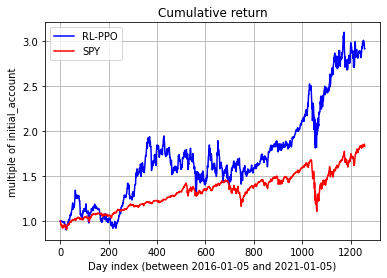

In [18]:
start_eval_date = '2016-01-05'
end_eval_date = '2021-01-05'

tickers = {'TSLA': 0, 'AAPL': 0, 'MSFT': 0}

agent = AgentPPO.AgentPPO() # AgentSAC(), AgentTD3(), AgentDDPG()?
agent.if_use_gae = True
agent.lambda_entropy = 0.04

initial_stocks = np.zeros([len(tickers)]).tolist()
print(initial_stocks)

env_eval = StockEnvMultiple(daterange, tickers=tickers,
                            begin_date=start_eval_date,
                            end_date=end_eval_date)


agent.if_on_policy = False
args = Arguments(env_eval, agent)

args.if_remove = False
args.cwd = './models/RLStockPPO_v3/'
args.gamma = gamma
args.break_step = int(2e5)
args.net_dim = 2 ** 9
args.max_step = args.env.max_step
args.max_memo = args.max_step * 4
args.batch_size = 2 ** 10
args.repeat_times = 2 ** 3
args.eval_gap = 2 ** 4
args.eval_times1 = 2 ** 3
args.eval_times2 = 2 ** 5
args.if_allow_break = False
args.target_return = 1.1e7

args.rollout_num = 6 # the number of rollout workers (larger is not always faster)
args.init_before_training()

env_eval.draw_cumulative_return(args, torch)
plt.show()

In [ ]:
plt.show()